# <center>Finding Donors for CharityML <center> 
<center>Reporter: Ngoc Nguyen<center>

## 1. Introduction
The aim of this project is to find an appropriate training model from the provided Cencus dataset to predict whether the income of any random person living in the U.S. is 50000$/year or more. The prediction result is necessary for assessing the posibility that the person will donate for CharityML. Proper decisions such as whether or not that person should be contacted to ask for donations or the requested donation amount can be made upon the prediction.

In the first part of the project the dataset will be cleaned and preprocessed. Eploratory data analyses (EAD) are carried out. Different visualization techniques are implemented to perform a preliminary analysis of the impact of each feature (or independent variable, or covariate) on the responsive variable (or dependent variable) 'income'. The predictive models are then built using the mentioned predictive algorithms.  

Three different predictive models/algorithms – a Logistic Regression model, a Random Forest model, and a Support Vector Machines (SVM) model are fitted to the refined dataset. The prediction accuracy of all model will later be evaluated.

## 2. Data cleaning and preprocessings

In [1]:
#!pip install imblearn  

In [72]:
## import libraries and modules
import numpy as np
import pandas as pd
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE


In [3]:
## import data
missing_values = ['n/a','na','-','','?','NaN','Nan','NA','--']
df=pd.read_csv('census.csv', na_values = missing_values)
## First learning of the data
print('Dimensions of the dataframe: ',df.shape)
#print('Five first rows of the dataframe:\n',df.head())
#print('Types of features: \n',df.dtypes)
print('Summary of missing obsevations\n',df.isnull().sum())
#print('Element counts of capital-gain var: \n', df['capital-gain'].value_counts())
#print('Element counts of capital-loss var: \n', df['capital-loss'].value_counts())

Dimensions of the dataframe:  (45222, 14)
Summary of missing obsevations
 age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


The Census data contains 45222 datapoints, each has 14 feature out of which 13 features are independent variables and 1 feature (income) is the dependent targeted variable. Only the features 'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week' are in number formats (i.e. integers, floats) and are continuous variables. The rest are of object type.

The data cleaning process is first carried out to detect missing observations or invalid values in the dataset. These values shall be marked as NaN (Not a Number) so they will be ignored in future steps while other features that describe the same person are still kept and processed to ensure sufficient data for training the model. It can be seen from the summary that the dataset has already been refined.


Data descriptions: 
                 age  education-num  capital-gain  capital-loss  hours-per-week
count  45222.000000   45222.000000  45222.000000  45222.000000    45222.000000
mean      38.547941      10.118460   1101.430344     88.595418       40.938017
std       13.217870       2.552881   7506.430084    404.956092       12.007508
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       47.000000      13.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000


Text(0.5,0.98,'')

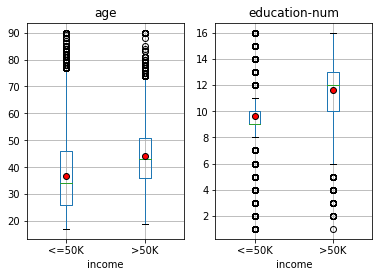

<Figure size 432x288 with 0 Axes>

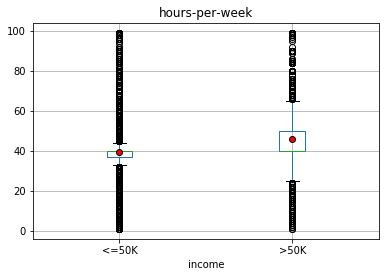

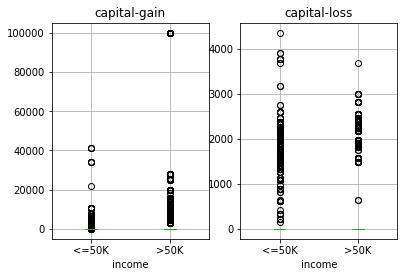

In [4]:
print('Data descriptions: \n',df.describe())
meanpointprops = dict(marker='o', markeredgecolor='black', markerfacecolor='red')
plt.figure()
ax_1=plt.subplot(1, 2, 1)
df.boxplot(column=['age'], by='income',ax=ax_1, showmeans=True,meanprops=meanpointprops)
ax_2=plt.subplot(1, 2, 2)
df.boxplot(column=['education-num'], by='income',ax=ax_2, showmeans=True,meanprops=meanpointprops)
plt.suptitle('') 
plt.figure()
df.boxplot(column=['hours-per-week'], by='income',showmeans=True,meanprops=meanpointprops)
plt.suptitle('')
plt.figure()
ax_1=plt.subplot(1, 2, 1)
df.boxplot(column=['capital-gain'], by='income',ax=ax_1)
ax_2=plt.subplot(1, 2, 2)
df.boxplot(column=['capital-loss'], by='income',ax=ax_2)
plt.suptitle('')  

The continuous variables (inputs) are then group-plotted for two groups of income, i.e. >=50k and <=50k. The first three figures show that the three corresponding variables significantly influence the income. The boxplots also show that all of the feature data contain many outliers. In addition, the statistics imply that there are many zero points in the 'capital-gain' and 'capital-loss' variables. That is, 41432 zeros in 'capital-gain' and 43082 zeros in 'capital-loss', out of 45222 data points for each variable. This may prominently disrupt the following analyses. These zeros thus must be removed from the dataset, namely, replaced by NaN. Next, based on the observation that the number of zeros in the two cases are 92% and 95% the total values, not to mention the big number of outliers. These two variables will be excluded in the future predictive analyses.

The 'native-country' variable has two many categories, i.e. two large degree of freedom, which might lead to overfitting. The categories have to be recategorized into larger groups. One possible way to do this is using the country geographic locations. The new data groups with counts are described in the code results.

The dataset is then divided into two subsets, the training subset takes the first 7/10 the datapoints and the testing subset takes rest of the datapoints. 

In [5]:
df['cap-gain']=df['capital-gain']
df['cap-loss']=df['capital-loss']
## Create new variables cap-gain and cap-loss that are respectively, capital-gain and 
## capital-loss with zeros replaced by NaN
df['cap-gain'].replace(0, np.nan, inplace=True)
df['cap-loss'].replace(0, np.nan, inplace=True)

#df['native-country'].value_counts()
df['regions']=df['native-country']
key = dict.fromkeys(['United-States','Canada'], 'North-America')
df['regions'] = df['regions'].replace(key,regex=True)
key = dict.fromkeys(['Mexico','Cuba','Guatemala','Jamaica','Nicaragua','Puerto-Rico'\
                    ,'Dominican-Republic','El-Salvador','Haiti','Honduras','Trinadad&Tobago'],'Central_America')
df['regions'] = df['regions'].replace(key,regex=True)
key = dict.fromkeys(['Philippines','China','Japan','Vietnam','Taiwan','Thailand','Hong'\
                     ,'Cambodia','Laos'], 'East_Asia')
df['regions'] = df['regions'].replace(key,regex=True)
key = dict.fromkeys(['Ecuador','Peru','Columbia'],'South_America')
df['regions'] = df['regions'].replace(key,regex=True)
key = dict.fromkeys(['Germany','England','Italy','Portugal','Greece','France','Ireland'\
                    ,'Scotland','Holand-Netherlands'],'West_EU')
df['regions'] = df['regions'].replace(key,regex=True)
key = dict.fromkeys(['Poland','Hungary','Yugoslavia'],'East_EU')
df['regions'] = df['regions'].replace(key,regex=True)
key = dict.fromkeys(['India','Iran'],'Central_Asia')
df['regions'] = df['regions'].replace(key,regex=True)
print('The new regions variable:\n',df['regions'].value_counts())


The new regions variable:
  North-America                 41455
 Central_America                1806
 East_Asia                       727
 West_EU                         616
 Central_Asia                    203
 South_America                   170
 East_EU                         122
 South                           101
 Outlying-US(Guam-USVI-etc)       22
Name: regions, dtype: int64


In [6]:
## Recategorize 'age' variable
#labels=['younger-than-30', '30-to-40', '40-to-45','45-to-50','50-to-70','older-than-90']
#df['age_group'] = pd.cut(df.age, bins=[0,30,40,45,50,70,90], right=False, labels=labels)
## Recategorize 'hours-per-week' variable
labels_h=['less-than-40h', '40h-to-45h', '45h-to-60h','60h-to-80h','more-than-80h']
df['hours'] = pd.cut(df['hours-per-week'], bins=[0,40,45,60,80,100], right=False, labels=labels_h)

## 3. Exploratory data analysis (EDA)

### 3.1. Assessment of the dependent variable 'income'
For the dependent variable 'income', the <=50k group take 75% of the total values, and the rest 25% are >=50k group. The predictive model should be able to distinguish the two income groups upon the contributions of the input features. 

<=50K    34014
>50K     11208
Name: income, dtype: int64

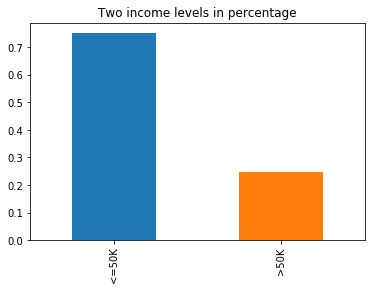

In [7]:
plt.figure()
fig=df['income'].value_counts(normalize=True).plot.bar()
fig.set_title('Two income levels in percentage')
df['income'].value_counts()

### 3.2. Correlations between independent and dependent variables
The next step of EDA is to find the correlations between 'income' and other variables. The continuous variables are processed first since the foregoing boxplot has suggested their influences on the income. For the age variable, its histogram shows a large count for the 20-50 age-group. The density plot visualizes the correlation between income and age. People around 45 years old have the largest propability to earn more than 50K/year.

Text(0,0.5,'Density distribution of age')

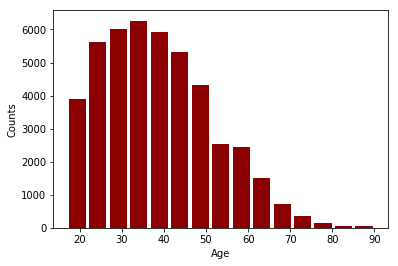

<Figure size 432x288 with 0 Axes>

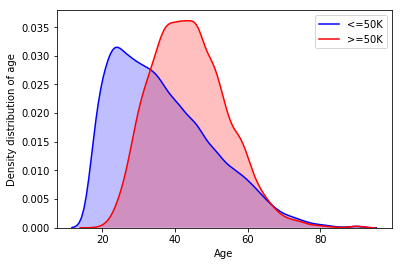

In [8]:
## Supporting plots and graphs for EDA
## Age histogram for all levels of income
plt.figure()
fig=df['age'].hist(bins=15, grid=False, histtype='bar', color='darkred',rwidth=0.85)
plt.xlabel('Age')
plt.ylabel('Counts')
## Density distribution for the two levels of income
plt.figure()
fig1, ax1 = plt.subplots()
sns.kdeplot(df.age[df.income == '<=50K'],label='<=50K',shade=True,color='blue',ax=ax1)
sns.kdeplot(df.age[df.income == '>50K'],label='>=50K',shade=True,color='red',ax=ax1)
plt.xlabel('Age')
plt.ylabel('Density distribution of age')
#df.groupby(['income'])['age'].value_counts()

Other variable normalized counts are also visualized by barplots, grouped by two income levels. The plots show large correlation between the 'sex' variable and income. In both levels of income, male outruns female in number. For the >50K income level, the male/female ratio is even larger. The 'relationship' and 'marital-status' variables tell an analogous stoty about how they influence the 'income' variable. One of them (relationship) is thus excluded from the predictive analysis to reduce number of features, or dimensions, and avoid overfitting. 

The other variables such as 'education_level', 'workclass', 'regions', 'occupation' and even 'race' play an important role in predicting whether or not an individual earns 50K or more a year. However, the correlation between two variables needs to be quantitatively analized for a persuasive conclusion on their dependency. An analysis on the dependency between the covariates and 'income' is therefore also carried out in the next section.

Text(0,0.5,'Race')

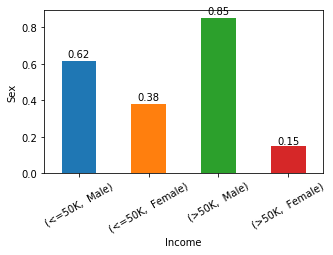

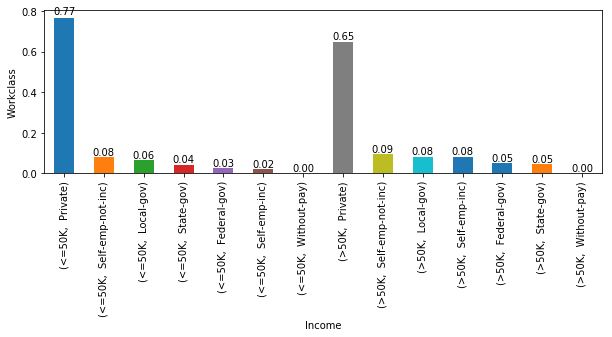

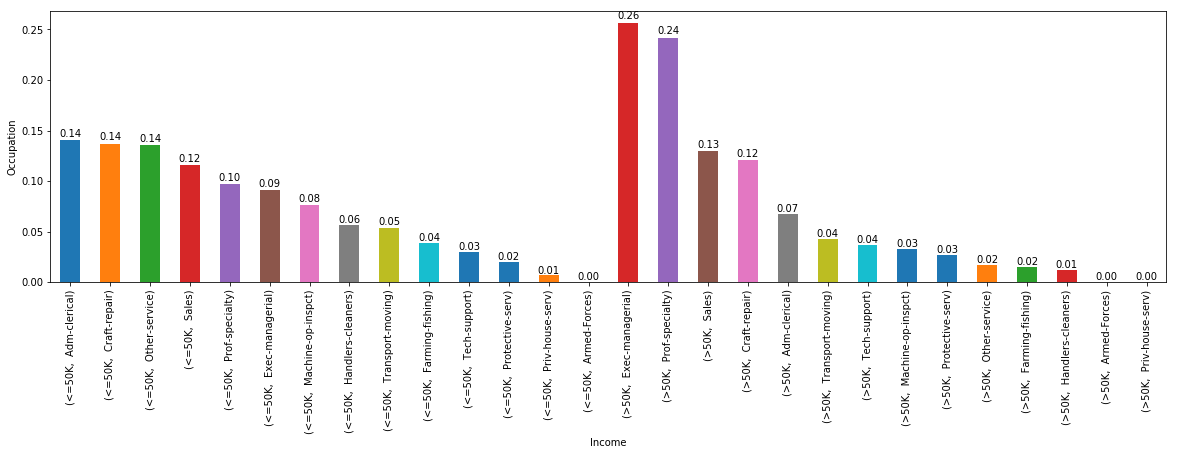

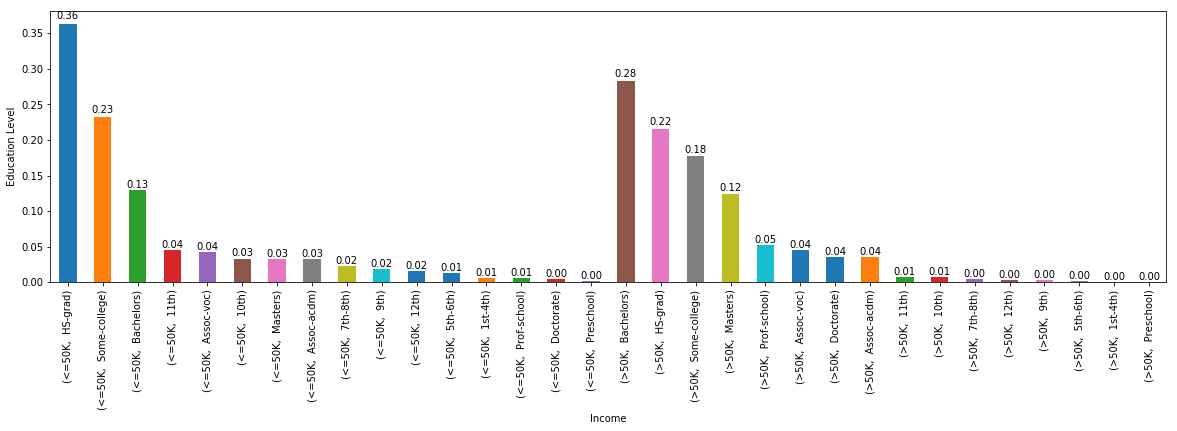

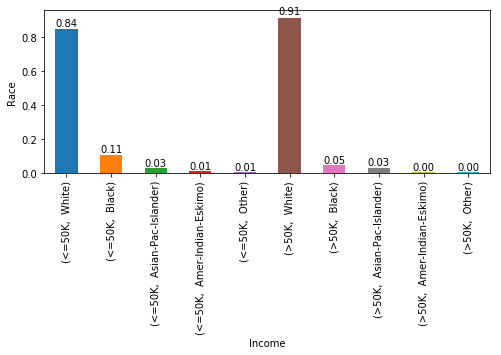

In [77]:
plt.figure()
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,'{0:.2f}'.format(height),ha='center', va='bottom')
group = df.groupby('income')
ax=group['sex'].value_counts(normalize=True).plot.bar(rot=30, figsize=(5,3),cmap=plt.jet())
autolabel(ax.patches)
plt.xlabel('Income')
plt.ylabel('Sex')
plt.figure()
ax=group['workclass'].value_counts(normalize=True).plot.bar(rot=90, figsize=(10,3))
autolabel(ax.patches)
plt.xlabel('Income')
plt.ylabel('Workclass')
plt.figure()
ax=group['occupation'].value_counts(normalize=True).plot.bar(rot=90, figsize=(20,5))
autolabel(ax.patches)
plt.xlabel('Income')
plt.ylabel('Occupation')
plt.figure()
ax=group['education_level'].value_counts(normalize=True).plot.bar(rot=90, figsize=(20,5))
autolabel(ax.patches)
plt.xlabel('Income')
plt.ylabel('Education Level')
plt.figure()
ax=group['race'].value_counts(normalize=True).plot.bar(rot=90, figsize=(8,3))
autolabel(ax.patches)
plt.xlabel('Income')
plt.ylabel('Race')

Text(0,0.5,'Relationship')

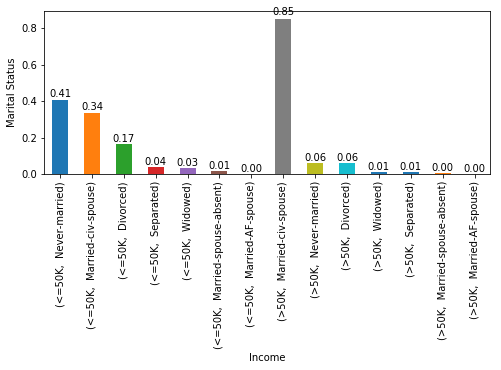

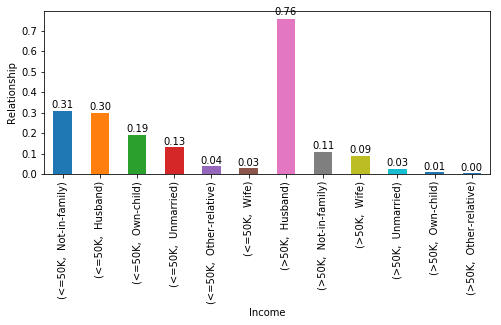

In [78]:
plt.figure()
ax=group['regions'].value_counts(normalize=True).plot.bar(rot=90, figsize=(8,3))
autolabel(ax.patches)
plt.xlabel('Income')
plt.ylabel('Global regions')
plt.figure()
ax=group['marital-status'].value_counts(normalize=True).plot.bar(rot=90, figsize=(8,3))
autolabel(ax.patches)
plt.xlabel('Income')
plt.ylabel('Marital Status')
plt.figure()
ax=group['relationship'].value_counts(normalize=True).plot.bar(rot=90, figsize=(8,3))
autolabel(ax.patches)
plt.xlabel('Income')
plt.ylabel('Relationship')

### 3.3. Variable dependency

The dependency between the covariates X and the responsive variable 'income' is concluded using the Pearson correlation test. The statement "X and income are dependent" is assigned to null hypothesis H_0, while H_A is the alternative hypothesis of H_0. The significance level p_given is 0.05. Since all the obtained p-values are smaller than 0.05, it is concluded from the correlation test that the responsive variable 'income' is not unlikely dependent on all the covariates.

In [10]:
## Calculate p-value of correlated covariate-income pairs
chi2, p, ddof, expected = stats.chi2_contingency(pd.crosstab(df['sex'],df['income']))
print('sex vs income, p-value= ','{0:.5f}'.format(p))
chi2, p, ddof, expected = stats.chi2_contingency(pd.crosstab(df['age'],df['income']))
print('age vs income, p-value= ','{0:.5f}'.format(p))
chi2, p, ddof, expected = stats.chi2_contingency(pd.crosstab(df['education_level'],df['income']))
print('education_level vs income, p-value= ','{0:.5f}'.format(p))
chi2, p, ddof, expected = stats.chi2_contingency(pd.crosstab(df['race'],df['income']))
print('race vs income, p-value= ','{0:.5f}'.format(p))
chi2, p, ddof, expected = stats.chi2_contingency(pd.crosstab(df['workclass'],df['income']))
print('workclass vs income, p-value= ','{0:.5f}'.format(p))
chi2, p, ddof, expected = stats.chi2_contingency(pd.crosstab(df['regions'],df['income']))
print('regions vs income, p-value= ','{0:.5f}'.format(p))
chi2, p, ddof, expected = stats.chi2_contingency(pd.crosstab(df['hours-per-week'],df['income']))
print('hours-per-week vs income, p-value= ','{0:.5f}'.format(p))
print('etc.')

sex vs income, p-value=  0.00000
age vs income, p-value=  0.00000
education_level vs income, p-value=  0.00000
race vs income, p-value=  0.00000
workclass vs income, p-value=  0.00000
regions vs income, p-value=  0.00000
hours-per-week vs income, p-value=  0.00000
etc.


## 4. Predicitve models and algorithms
### 4.1. Logistic regression
Since 'income' is a responsive variable with only two possible values: '<=50K' (could be labeled as binary 0) and '>50K' (labeled as binary 1), the predictive model is binary logistic. Logistic regression is thus applied as a learning tecnique to train the model. From the first figure in section 3.1, it can be observed that there is an inbalance between the occurences of the two income levels. The '<=50K' level remarkably outweights the '>50K' one. The dataset thus needs over-sampling, done by using SMOTE. Note that the dataset contains non-numeric data. However, machine learning algorithms can only learn from numbers. The data therefore need to be encoded before itt is used to train the model. 

In [20]:
## Drops unessessary features
data=df.drop(columns=['native-country','hours-per-week','capital-gain','capital-loss','relationship'],axis=1)

le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
## Over-sampling using SMOTE. Create training and testing inputs 
X = data.loc[:, data.columns != 'income']
y = data.loc[:, data.columns == 'income']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['income'])

print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['income']==0]))
print("Number of subscription",len(os_data_y[os_data_y['income']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['income']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['income']==1])/len(os_data_X))


       age  workclass  education_level  education-num  marital-status  \
45217   16          2                9             12               4   
45218   22          2                9             12               0   
45219   21          2                9             12               2   
45220   27          2                9             12               0   
45221   18          3                9             12               2   

       occupation  race  sex  income  cap-gain  cap-loss  regions  hours  
45217           9     4    1       0     12734     13768        4      0  
45218           9     4    0       0     12735     13769        4      3  
45219           9     4    1       0     12736     13770        4      1  
45220           0     1    1       0        80     36108        4      0  
45221           3     4    1       1     41551     43177        4      2  
length of oversampled data is  47512
Number of no subscription in oversampled data 23756
Number of subscription

C:\Users\nn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The model is implemented and from the analysis results, the p-values for almost all of the variables are smaller than 0.05, except 'cap-loss', therefore, this variable will be removed. After prediction step, the accuracy of logistic regression classifier on the test dataset is 0.689. In the classfication report table, recall that 0 represents the '<=50K' income level and 1 the other level (i.e. Positive class), the model is good at recognizing the 0 level. However it is not as good for predicting the 1 level.

In [64]:
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())

## Drop variable cap-loss since its p-value > 0.05
X_tr=os_data_X.drop(columns=['cap-loss'],axis=1)
X_te=X_test.drop(columns=['cap-loss'],axis=1)

## Training data
logreg = LogisticRegression()
logreg.fit(X_tr, os_data_y)

## Predictive test
y_pred = logreg.predict(X_te)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_te, y_test)))

#y_true=np.ravel(y_test.values)
## Confusion matrix
#confusion_matrix = confusion_matrix(y_true, y_pred)
#print('Confusion matrix: \n',confusion_matrix)

## Validating
print('\n',classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.543388
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.216     
Dependent Variable: income           AIC:              51658.9255
Date:               2018-10-13 23:02 BIC:              51764.1503
No. Observations:   47512            Log-Likelihood:   -25817.   
Df Model:           11               LL-Null:          -32933.   
Df Residuals:       47500            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age               0.0369   0.0010  38.6103 0.0000  0.0350  0.0388
workclass        -0.3095   0.0119 -26.0298 0.0000 -0.3328 -0.2862


C:\Users\nn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.689

               precision    recall  f1-score   support

           0       0.88      0.68      0.77     10258
           1       0.42      0.72      0.53      3309

   micro avg       0.69      0.69      0.69     13567
   macro avg       0.65      0.70      0.65     13567
weighted avg       0.77      0.69      0.71     13567



### 4.2. Random Forest
The random forest model is fitted on the SMOTE training dataset with 500 estimators and 42 random states. After being used to predict the testing set, the model provide an accuracy of 82.96%, much higher than that of the Logistic Regression model.

In [106]:
## Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500)

## Train the model on training data
rf.fit(X_tr, os_data_y)


## Testing data
y_predct = rf.predict(X_te)


## Accuracy test

print("Accuracy: ",metrics.accuracy_score(y_test, y_predct.round()))

C:\Users\nn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy:  0.829586496646274


In [ ]:
f_label=X_tr.columns
feature_imp = pd.Series(rf.feature_importances_,index=flabel).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.legend()
plt.show()

### 4.3. Support Vector Machines (SVM)

In [ ]:
SV=svm.SVC(kernel='poly')
SV.fit(X_tr, np.ravel(os_data_y.values))
y_predict_svm=SV.predict(X_te)
print('SVM')
print('Mean of predicted and testing y: ',np.mean((y_predict_svm-y_test)**2))
print('Accuracy on training set: ',SV.score(X_tr,np.ravel(os_data_y.values)))
print('Accuracy on testing set: ',SV.score(X_te,y_test))
print('Accuracy of SVM classifier on test set: {:.3f}'.metrics.accuracy_score(y_test, y_predct.round()))


C:\Users\nn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 5. Summary and conclusions
In this predictive analysing project, three models for training data: Logistic regression (LR), Random Forest (RF), and SVM are respectively predict the income level of any US individual. The training data are balanced by SMOTE oversampling technique. The accuracies of the three models are respectively 68.90%, 82.95%, and   . The LR algorithm gives much lower accuracy probably due to the large number of outliers in the features, to which it is significantly sensitive. The RF algorithm, on the other hand, is more highly accurate and robust due to the large number of decision trees participating in the process.
The runtime for these algorithms is arranged as time_LR < time_RF < time_SVM. 

In [ ]:
#_ih[-10:]